# DSG2019: Practice on regression methods

## Pierre Tandeo, IMT-Atlantique (pierre.tandeo@imt-atlantique.fr)

In this practice, we use different regression methods (both linear and nonlinear) to fit simulated data. We use a famous python library for machine learning: scikit-learn (http://scikit-learn.org/stable/index.html). Visit this website as soon as you need more information about a function.

### Import library and adjust python parameters

In [1]:
# import classical libraries
%matplotlib inline
%pylab inline

# avoid warnings
import warnings
warnings.filterwarnings("ignore")

# figure size
rcParams['figure.figsize'] = (16, 9)

Populating the interactive namespace from numpy and matplotlib


### Data generation

We generate $y$ (response/output variable) and $x$ (covariate/input variable) using the following model:
$y = \sin(x) + \epsilon$, with $\epsilon ~ \sim \mathcal{N}\left(0, (1/4)^2\right)$.

Text(0.5,1,'Raw data and true model')

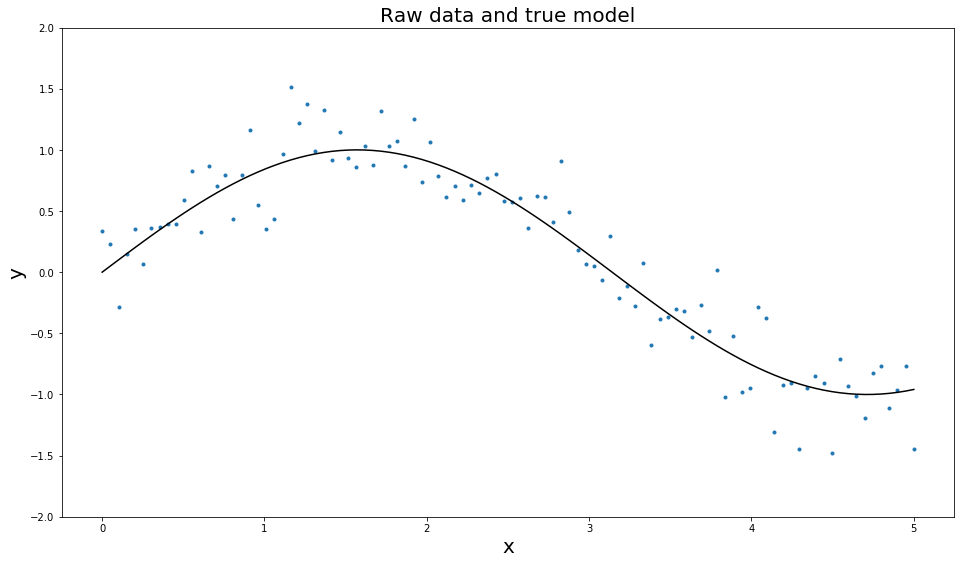

In [2]:
# generate x and y
random.seed(10) # setting seed for reproducability
n = 100 # number of sample
x = array([linspace(0, 5, n)]).T
y = sin(x) + random.normal(0,0.25,size=shape(x))

# plot data
plot(x, y, '.')
plot(x, sin(x), '-k')
ylim([-2, 2])
xlabel('x', size=20)
ylabel('y', size=20)
title('Raw data and true model', size=20)

### Simple linear regression

In the simple linear regression, we adjust the model $y = \beta_0 + \beta_1 x$ with $\beta_0$ the intercept and $\beta_1$ the slope. You use generic functions of scikit-learn for regression:
- *LinearRegression()* to declare the linear regression model
- *fit()* to adjust the model and estimate the $\beta$ parameters
- *predict()* to apply a fitted model to the input data $x$ and get previsions $\widehat{y}$
- *intercept_* and *coef_* attributes to get the estimated $\widehat{\beta}$ parameters

Then, we suggest to compute a score to evaluate the fitting performances. A famous score is the Root Mean Squared Error (RMSE) given by: $\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n \left(y_i - \widehat{y}_i \right)^2}$.

**Questions:**
- adjust the simple linear regression 
- plot the fitted model
- compute the RMSE

beta_0 = [ 1.17376632]
beta_1 = [[-0.40676081]]


Text(0.5,1,'Simple linear regression')

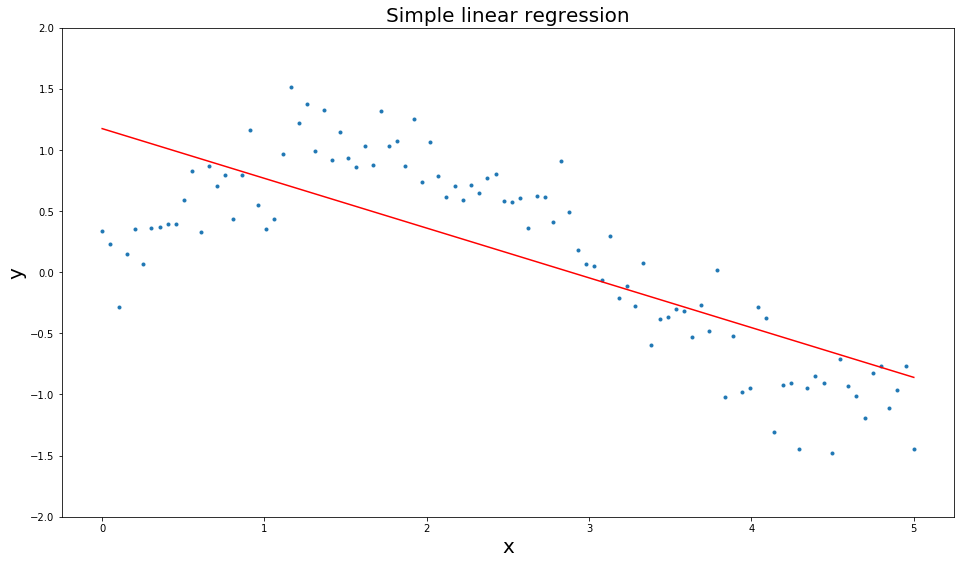

In [3]:
# import functions
from sklearn.linear_model import LinearRegression

# adjust simple linear regression (slm) between x and y
reg_slm = LinearRegression()
reg_slm.fit(x, y)

# print beta parameters
print('beta_0 = ' + str(reg_slm.intercept_))
print('beta_1 = ' + str(reg_slm.coef_))

# use the fitted model to get predictions on x
y_slm = reg_slm.predict(x)

# plot results
plot(x, y, '.')
plot(x, y_slm, '-r')
ylim([-2, 2])
xlabel('x', size=20)
ylabel('y', size=20)
title('Simple linear regression', size=20)

In [4]:
# compute score
RMSE_slm = sqrt(mean((y - y_slm)**2))
print('RMSE(slm) = ' + str(RMSE_slm))

RMSE(slm) = 0.492938461308


### Mutiple linear regression

As shown previously, if we only use x and the linear regression, we are not able to fit correctly the data. Thus, we propose to generate new predictors using different powers of $x$ such as $x^1$, $x^2$, $\dots$, $x^{15}$. They will be stock in the $X$ matrix. Then, we will apply the linear regression between $X$ and $y$. This is known as the multiple linear regression (here, polynomial regression). The model is given by $y = \beta_0 + \beta_1 x + \beta_2 x^2 + \dots + \beta_{15} x^{15}$.

**Questions:**
- adjust the multiple linear regression and compute the RMSE
- compare the results to the simple linear regression

RMSE(mlr) = 0.224126051233


Text(0.5,1,'Multiple linear regression')

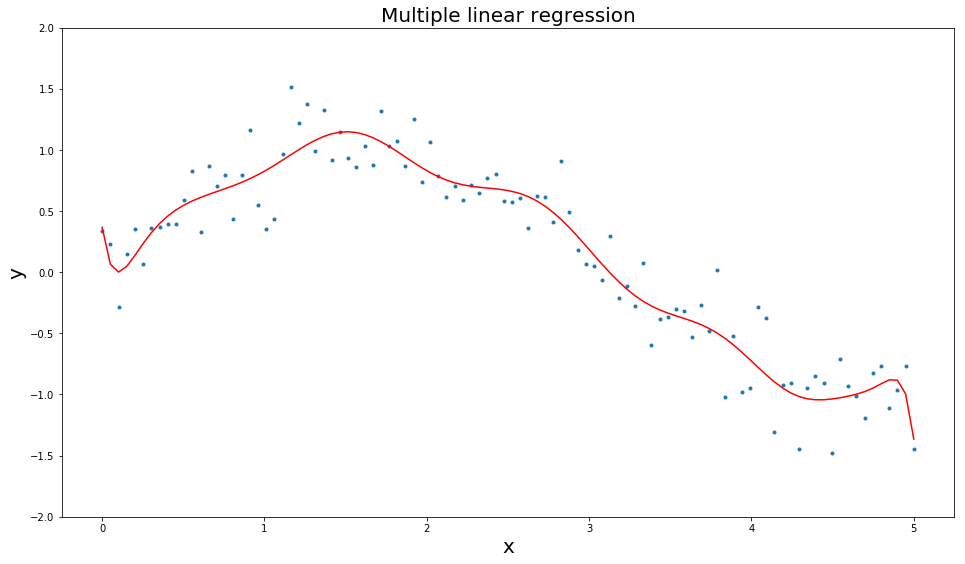

In [5]:
# generate X matrix
X=zeros((n, 15))
for i in range(15):
    X[:,i] = ravel(x**(i+1))
    
# adjust multiple linear regression (mlr) between X and y
reg_mlr = LinearRegression()
reg_mlr.fit(X, y)
y_mlr = reg_mlr.predict(X)

# compute score
RMSE_mlr = sqrt(mean((y - y_mlr)**2))
print('RMSE(mlr) = ' + str(RMSE_mlr))

# plot results
plot(x, y, '.')
plot(x, y_mlr, '-r')
ylim([-2, 2])
xlabel('x', size=20)
ylabel('y', size=20)
title('Multiple linear regression', size=20)

### Cross-validation to choose the best number of predictors

In the previous examples, we have seen that if we add predictors, we reduce the RMSE score. But, as we use the same datasets to fit and test the model, we are maybe overfitting the data... To test this and evaluate the optimal number of predictors in the multiple linear regression, we propose to use the following cross-validation procedure:
- divide the dataset randomly (2/3 for training and 1/3 for test) for each iteration
- use 1000 iterations
- compute the median RMSE of the 1000 iterations

This procedure is easy to implement in scikit-learn using *ShuffleSplit()* and *cross_val_score()*.

**Questions:**
- declare the cross-validation
- calculate the RMSE for each degree of the polynomial by cross-validation
- apply the regression with the optimal number of degrees for the polynomial regression
- plot and compare this fit to the true model

Text(0.5,1,'Cross-validation')

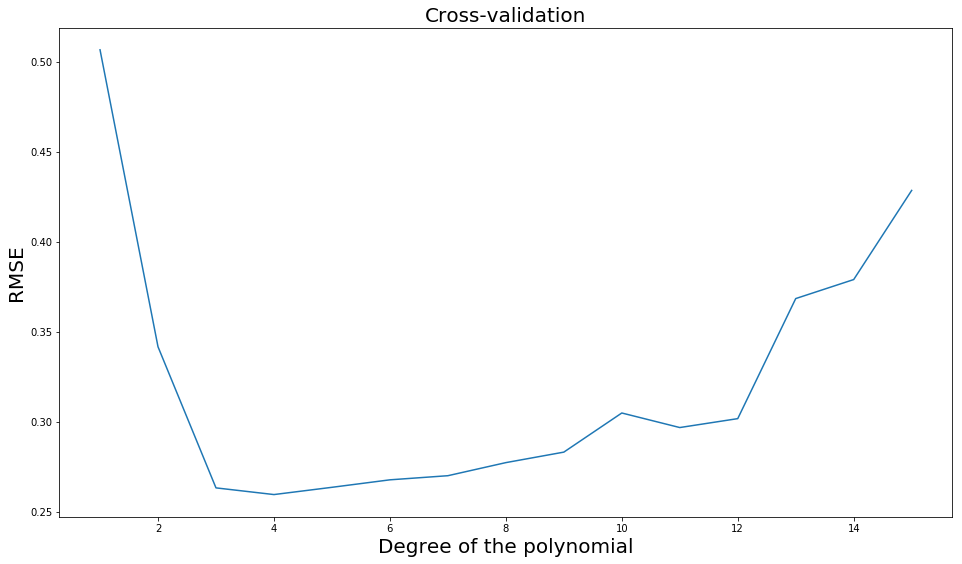

In [20]:
# import functions
from sklearn.model_selection import cross_val_score, ShuffleSplit

# declare the cross-validation procedure (cvp)
cvp = ShuffleSplit(n_splits=1000, test_size=1/3, train_size=2/3)

# example of computed RMSE on 100 cross-validations using multiple linear regression
RMSE = sqrt(-cross_val_score(reg_mlr, X, y, scoring='neg_mean_squared_error', cv=cvp))

# define the number of degrees between 1 and 15
n_degrees = 15
degrees = range(1, 16)

# loop on number of predictors and compute mean RMSE
tab_RMSE_mlr = zeros(n_degrees)
for i in range(n_degrees):
    tab_RMSE_mlr[i] = mean(sqrt(-cross_val_score(reg_mlr, X[:,0:degrees[i]], y, scoring='neg_mean_squared_error', cv=cvp)))

# plot results
plot(degrees, tab_RMSE_mlr)
xlabel('Degree of the polynomial', size=20)
ylabel('RMSE', size=20)
title('Cross-validation', size=20)

Text(0.5,1,'Multiple linear regression')

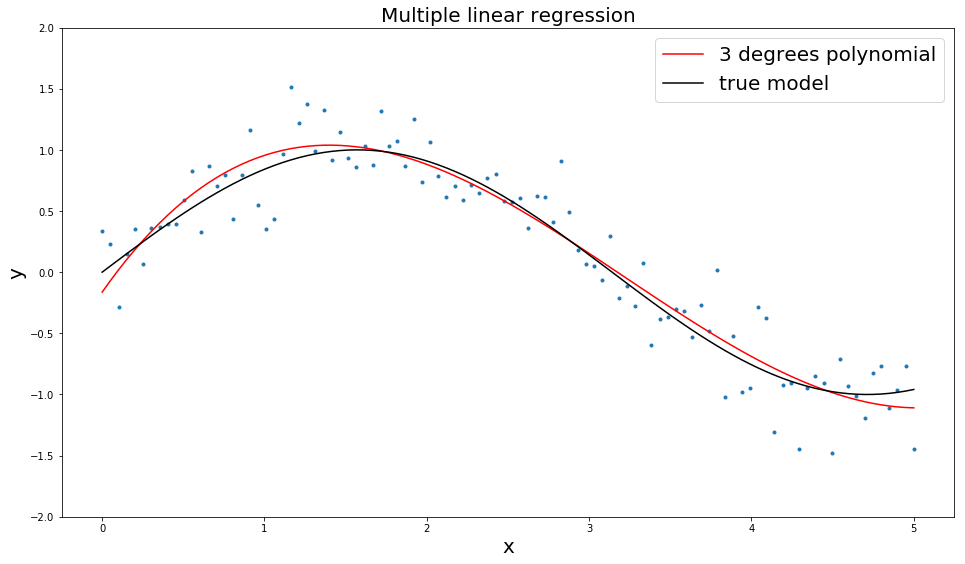

In [17]:
# apply polynomial regression with 3 degrees
reg_mlr = LinearRegression()
reg_mlr.fit(X[:,0:3], y)
y_mlr = reg_mlr.predict(X[:,0:3])

# plot results
plot(x, y, '.')
line1, = plot(x, y_mlr, '-r')
line2, = plot(x, sin(x), '-k')
ylim([-2, 2])
xlabel('x', size=20)
ylabel('y', size=20)
legend([line1, line2], ['3 degrees polynomial', 'true model'], prop={'size': 20})
title('Multiple linear regression', size=20)

### Lasso regression

Another way to select the optimal model is to use the Lasso regression. Lasso adds a sparse constraint on the $\beta$ parameters and try to find the $\beta$ parameters that minimize: $\sum_{i=1}^n \left( y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{i,j} \right)^2 + \alpha\sum_{j=1}^p \left| \beta_j \right|$.

**Questions:**
- generate $\alpha = (10^{-4}, 10^{-3}, 10^{-2}, 10^{-1}, 1)$
- for each alpha, compute the meadian RMSE by cross-validation
- for the best alpha parameter, have a look at the estimated $\beta$ parameters
- plot and compare this fit to the true model

Text(0.5,1,'Cross-validation')

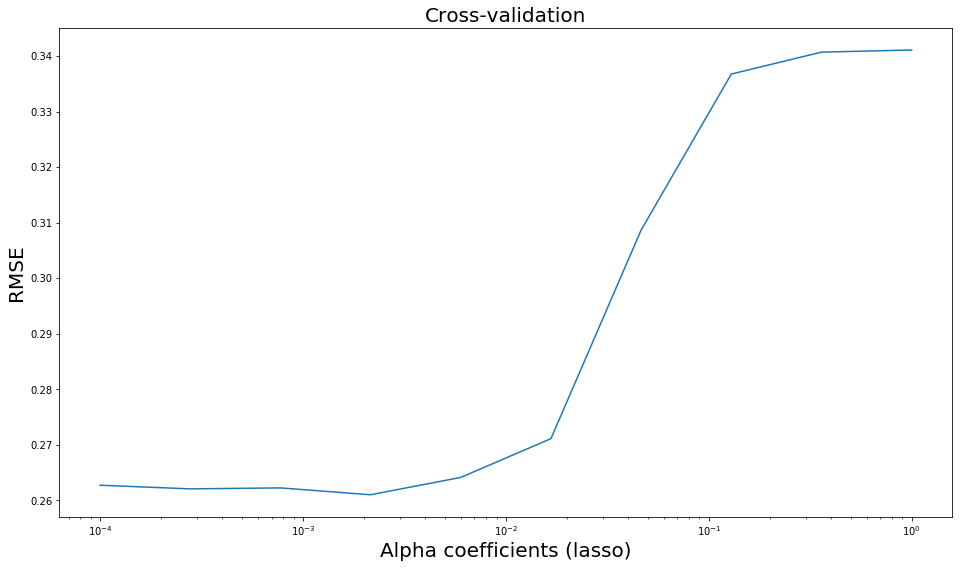

In [21]:
# import functions
from sklearn.linear_model import Lasso

# define the alphas between 10^(-4) and 1
n_alphas = 10
alphas = logspace(-4, 0, n_alphas)

# loop on the alpha parameters and compute mean RMSE
tab_RMSE_lasso = zeros(n_alphas)
for i in range(n_alphas):
    reg_lasso = Lasso(alphas[i])
    tab_RMSE_lasso[i] = mean(sqrt(-cross_val_score(reg_lasso, X, y, scoring='neg_mean_squared_error', cv=cvp)))

# plot results
plot(alphas, tab_RMSE_lasso)
xscale('log')
xlabel('Alpha coefficients (lasso)', size=20)
ylabel('RMSE', size=20)
title('Cross-validation', size=20)

beta: [  1.24826009e+00  -3.50435099e-01  -2.52805118e-02   5.98861489e-04
   4.43344775e-04   9.12959663e-05   1.56127889e-05   2.42924607e-06
   3.42724402e-07   4.05263201e-08   2.67514173e-09  -5.17924859e-10
  -3.08064958e-10  -1.01308178e-10  -2.79475515e-11]


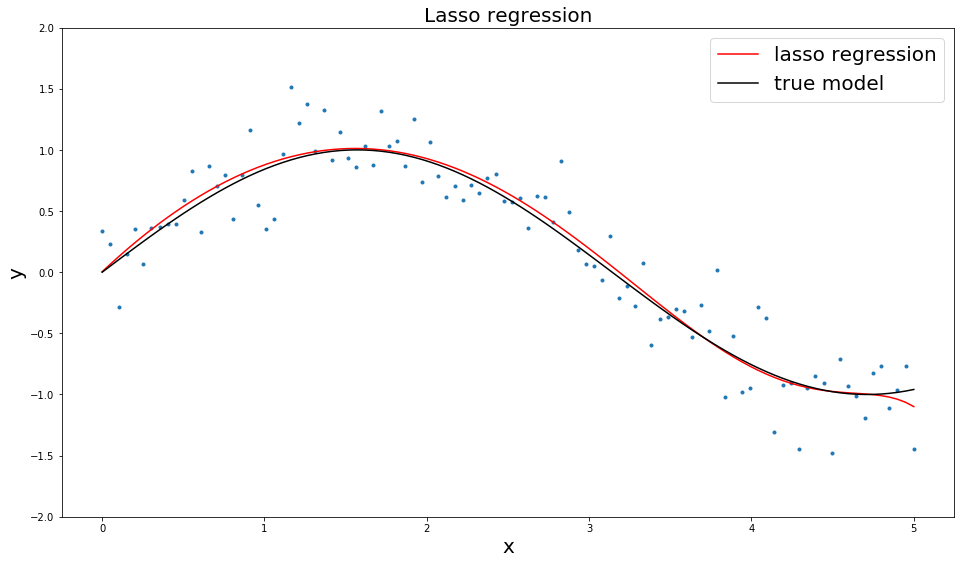

In [19]:
# adjust lasso regression between X and y
reg_lasso = Lasso(alpha=0.001)
reg_lasso.fit(X, y)
y_lasso = reg_lasso.predict(X)

# print beta parameters
print('beta: ' + str(reg_lasso.coef_))

# plot results
plot(x, y, '.')
line1, = plot(x, y_lasso, '-r')
line2, = plot(x, sin(x), '-k')
ylim([-2, 2])
xlabel('x', size=20)
ylabel('y', size=20)
title('Lasso regression', size=20)
legend([line1, line2], ['lasso regression', 'true model'], prop={'size': 20})

### Regression tree and forest

Now, we propose to use nonlinear regression methods. In this case, we will **not use anymore X** (the matrix with the 15 degrees of polynomial) but we will **only use x** (the initial input vector). We first test the regression tree. A important parameter in this technique is the depth of the tree: you will optimize this parameter by cross-validation. Then, we will buid a regression forest and plot the predicted values.

**Questions:**
- find the optimal depth of the tree by cross-validation using the *max_depth* parameter of *DecisionTreeRegressor()*
- draw the corresponding regression tree
- build a regression forest with 1000 trees using *n_estimators* parameter of *RandomForestRegressor()*
- plot and compare this fit to the true model

Text(0.5,1,'Cross-validation')

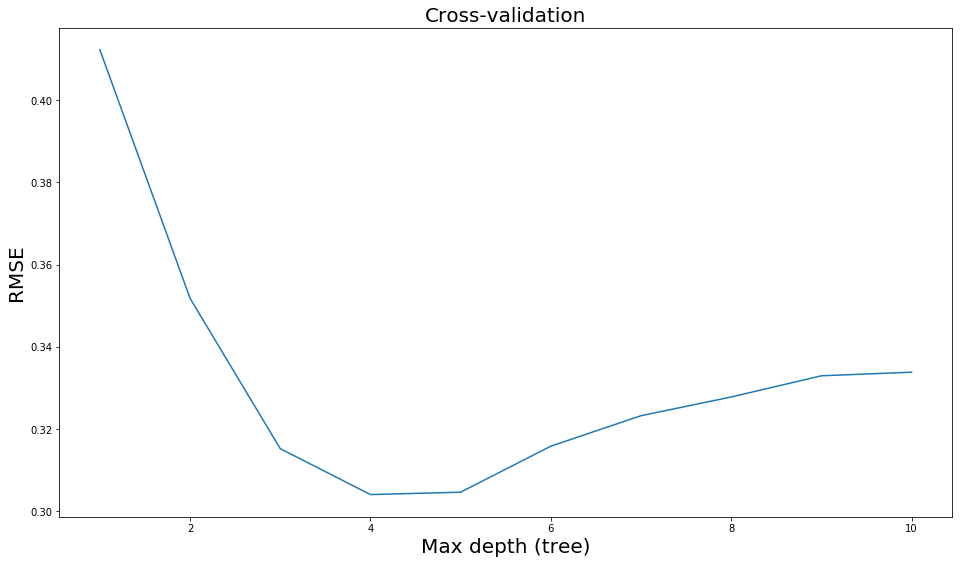

In [10]:
# import functions
from sklearn.tree import DecisionTreeRegressor

# define the max depths between 1 and 10
n_depths = 10
depths = linspace(1, 10, n_depths)

# loop on the max_depth parameter and compute median RMSE
tab_RMSE_tree = zeros(n_depths)
for i in range(n_depths):
    reg_tree = DecisionTreeRegressor(max_depth=depths[i])
    tab_RMSE_tree[i] = median(sqrt(-cross_val_score(reg_tree, x, y, scoring='neg_mean_squared_error', cv=cvp)))

# plot results
plot(depths, tab_RMSE_tree)
xlabel('Max depth (tree)', size=20)
ylabel('RMSE', size=20)
title('Cross-validation', size=20)

In [22]:
# if needed, install library using pip
#!pip install python-graphviz

# import functions
from sklearn.tree import export_graphviz
from graphviz import Source

# adjust regression tree with optimal depth
reg_tree = DecisionTreeRegressor(max_depth=4)
reg_tree.fit(x, y)
y_tree = reg_tree.predict(x)

# export the tree to "plot_tree.pdf"
plot_tree = export_graphviz(reg_tree, out_file=None) 
graph = Source(plot_tree) 
graph.render("plot_tree")

'plot_tree.pdf'

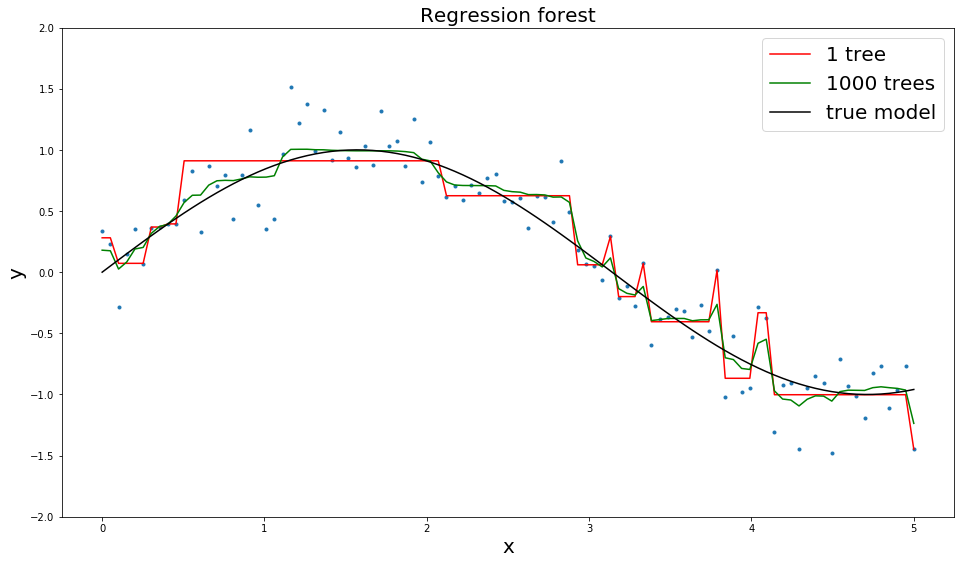

In [23]:
# import functions
from sklearn.ensemble import RandomForestRegressor

# adjust regression forest between X and y using 1000 trees
reg_forest = RandomForestRegressor(n_estimators=1000, max_depth=4)
reg_forest.fit(x, y)
y_forest = reg_forest.predict(x)

# plot results
plot(x, y, '.')
line1, = plot(x, y_tree, '-r')
line2, = plot(x, y_forest, '-g')
line3, = plot(x, sin(x), '-k')
ylim([-2, 2])
xlabel('x', size=20)
ylabel('y', size=20)
title('Regression forest', size=20)
legend([line1, line2, line3], ['1 tree', '1000 trees', 'true model'], prop={'size': 20})

### Local linear regression

Great, you are now an expert on data science! Now it is your turn to code a method. I suggest to code the local linear regression. Unfortunately, this nonlinear regression method is not provided by scikit-learn.

**Questions:**
- code the local linear regression
- fit the local linear regression with $\lambda=0.2$
- plot and compare this fit to the true model

In [13]:
# function to compute weights using a Gaussian kernel
def compute_weights(x_star, x, lmbda):
    
    # apply the Gaussian kernel
    w = exp((-(x_star-x)**2)/lmbda)
    
    # normalize the weights
    w = w/sum(w)
    
    # return the weights
    return w

# local linear regression function
def local_linear_regression(x, y, lmbda):
    
    # initialization
    y_llr = y*NaN
    
    # loop on samples
    for i in range(len(x)):
        
        # compute the weights
        w = compute_weights(x[i], x, lmbda)
        
        # apply the weighted regression
        reg = LinearRegression()
        reg.fit(x, y, ravel(w))
        y_llr[i] = reg.predict(array([x[i]]))
        
    # return the estimations
    return y_llr  

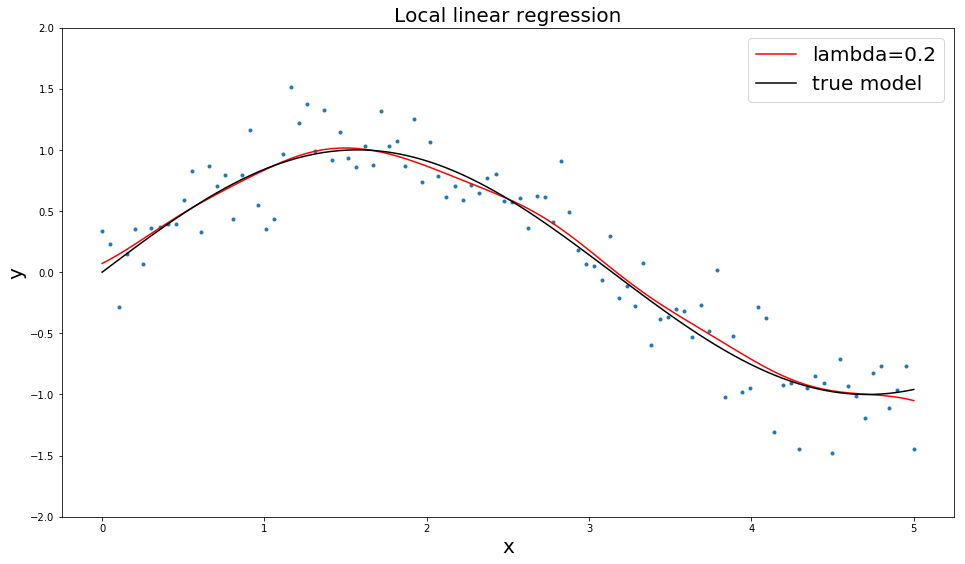

In [14]:
# adjust local linear regression between x and y
y_llr = local_linear_regression(x, y, 0.2)

# plot results
plot(x, y, '.')
line1, = plot(x, y_llr, '-r')
line2, = plot(x, sin(x), '-k')
ylim([-2, 2])
xlabel('x', size=20)
ylabel('y', size=20)
title('Local linear regression', size=20)
legend([line1, line2], ['lambda=0.2', 'true model'], prop={'size': 20})